In [38]:
#Loading the base Data
import pandas as pd
df=pd.read_csv('/Users/rarerabbit/Documents/Data Analysis/CustomerSegmentation.csv')
print(df.head())

                                     CUSTOMER_MOBILE  PCT_RTO_ORDS  \
0  2e746b3ab83ea71b37fd5fab530b3765c949506770bead...      4.545454   
1  6bf7bfadf14ef7a5f1012d3fa927210cab9a28c904d92a...      0.000000   
2  71d2b99b069037483cac87f0075a6a4db339cdfbcae053...      0.000000   
3  accd6553cc1962f321850def0f7a2b3b6fb768fd82be68...      0.000000   
4  d0f3725d142d0c74312c2c91f19dec53c2d55658c0c91f...      7.692308   

   PCT_CIR_ORDS  grossordercount  frequencyoforder  customerlifespanwithbrand  \
0      0.000000             21.0                13                       1827   
1      0.000000             12.0                11                        547   
2      6.666667             14.0                12                       1232   
3      3.125000             27.0                26                       1293   
4      7.692308              4.0                13                        533   

   averageordervalue  onlineandofflinepresence customer_tier  customer_score  
0        2792

In [41]:
#Dropping unnecessary fields
df1=df.drop(columns=['customer_score','customer_tier'], errors='ignore')
df1.rename(columns={
    'PCT_RTO_ORDS': 'RTO%',
    'PCT_CIR_ORDS': 'RTV%',
    'grossordercount': 'Gross Sold Qty',
    'frequencyoforder': 'Order Frequency',
    'customerlifespanwithbrand': 'Lifespan',
    'averageordervalue': 'AOV',
    'onlineandofflinepresence': 'OMNI',
}, inplace=True)
print(df1.columns.tolist())

['CUSTOMER_MOBILE', 'RTO%', 'RTV%', 'Gross Sold Qty', 'Order Frequency', 'Lifespan', 'AOV', 'OMNI']


In [47]:
#statistical SUmmary
exclude_cols=['OMNI','CUSTOMER_MOBILE']

numeric_cols=[col for col in df1.columns if col not in exclude_cols]
df2=df1[numeric_cols]
summary_stats= df2.describe().T
summary_stats['Median']=df2.median(numeric_only=True)
summary_stats['Mode']=df2.mode(numeric_only=True).iloc[0]
summary_stats=summary_stats[['count','mean','Median','Mode','std','min','max']]
summary_stats.columns=['Count','Mean','Median','Mode','Std Dev','Min','Max']
summary_stats=summary_stats.round(2)
print(summary_stats.to_string())


                    Count     Mean   Median    Mode  Std Dev      Min        Max
RTO%             807502.0     1.55     0.00     0.0     7.14      0.0      50.00
RTV%             807502.0     3.63     0.00     0.0    10.44      0.0      50.00
Gross Sold Qty   807502.0     3.13     2.00     1.0     5.60      1.0     606.00
Order Frequency  807502.0     2.43     1.00     1.0     3.33      1.0     324.00
Lifespan         807502.0   171.90     1.00     0.0   340.88      0.0    2276.00
AOV              807502.0  2526.16  1930.05  2999.0  2112.20 -40189.6  121360.94


In [51]:

import pandas as pd


exclude_cols = ['CUSTOMER_MOBILE', 'OMNI']
numeric_cols = [col for col in df1.columns if col not in exclude_cols]


df_numeric = df1[numeric_cols]


skew_kurt_df = pd.DataFrame({
    'Skewness': df_numeric.skew(numeric_only=True),
    'Kurtosis': df_numeric.kurtosis(numeric_only=True)
}).round(2)


print("Skewness & Kurtosis Summary:\n")
print(skew_kurt_df)


Skewness & Kurtosis Summary:

                 Skewness  Kurtosis
RTO%                 5.33     29.48
RTV%                 3.23      9.97
Gross Sold Qty      15.70    696.52
Order Frequency     11.24    409.63
Lifespan             2.42      5.62
AOV                  6.66    139.45


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
exclude_cols = ['CUSTOMER_MOBILE', 'OMNI']
numeric_cols = [col for col in df1.columns if col not in exclude_cols]
df_numeric = df1[numeric_cols]

sns.set(style="whitegrid")

plt.figure(figsize=(15, 25))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(len(df_numeric.columns), 1, i)
    sns.histplot(df_numeric[col], kde=True, color='steelblue', bins=50)
    plt.axvline(df_numeric[col].mean(), color='red', linestyle='--', label='Mean')
    plt.title(f"Skewness of {col}: {skew(df_numeric[col]):.2f}")
    plt.legend()

plt.tight_layout()
skew_path = "/Users/rarerabbit/Documents/Data Analysis/skewness_plot.jpg"
plt.savefig(skew_path, dpi=300)
print(f" Skewness plot saved to: {skew_path}")
plt.close()

# Plot bar chart of kurtosis
plt.figure(figsize=(10, 6))
kurtosis_values = df_numeric.apply(kurtosis)
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette='Set2')
plt.title("Kurtosis of Features")
plt.ylabel("Kurtosis")
plt.xticks(rotation=45)
plt.tight_layout()

kurtosis_path = "/Users/rarerabbit/Documents/Data Analysis/kurtosis_plot.jpg"
plt.savefig(kurtosis_path, dpi=300)
print(f"Kurtosis plot saved to: {kurtosis_path}")
plt.close()


 Skewness plot saved to: /Users/rarerabbit/Documents/Data Analysis/skewness_plot.jpg
Kurtosis plot saved to: /Users/rarerabbit/Documents/Data Analysis/kurtosis_plot.jpg


/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/3445365080.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette='Set2')


In [58]:
import numpy as np

# Apply log1p safely (log1p = log(1 + x)) for skewed features
df1['RTO%_log'] = np.log1p(df1['RTO%'])
df1['RTV%_log'] = np.log1p(df1['RTV%'])
df1['GrossQty_log'] = np.log1p(df1['Gross Sold Qty'])
df1['Freq_log'] = np.log1p(df1['Order Frequency'])
df1['Lifespan_log'] = np.log1p(df1['Lifespan'])


aov_min = df1['AOV'].min()
shift = abs(aov_min) + 1 if aov_min <= 0 else 0
df1['AOV_log'] = np.log1p(df1['AOV'] + shift)


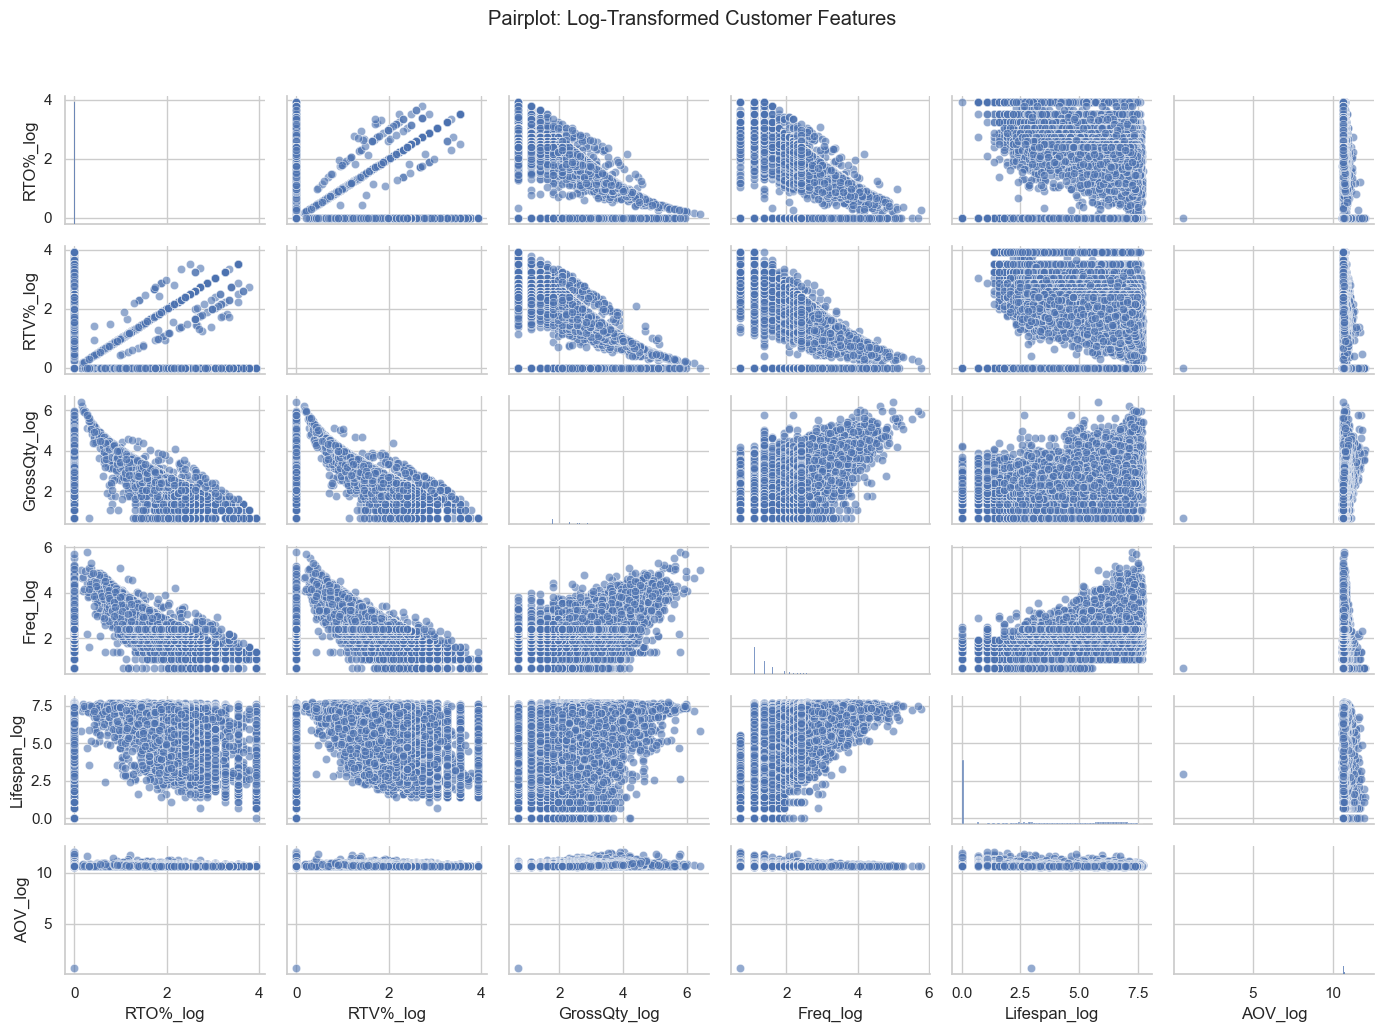

Pairplot saved at: /Users/rarerabbit/Documents/Data Analysis/log_transformed_pairplot.jpg


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


log_features = ['RTO%_log', 'RTV%_log', 'GrossQty_log', 'Freq_log', 'Lifespan_log', 'AOV_log']

pairplot_fig = sns.pairplot(df1[log_features], plot_kws={'alpha': 0.6})
pairplot_fig.fig.set_size_inches(14, 10)  # Optional: adjust plot size
pairplot_fig.fig.suptitle("Pairplot: Log-Transformed Customer Features", y=1.03)

# Save the plot
save_path = "/Users/rarerabbit/Documents/Data Analysis/log_transformed_pairplot.jpg"
pairplot_fig.savefig(save_path, dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

print(f"Pairplot saved at: {save_path}")


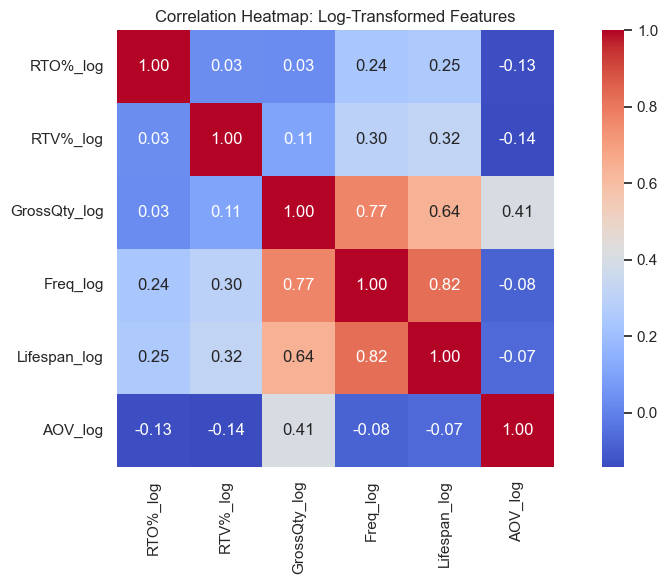

Heatmap saved at: /Users/rarerabbit/Documents/Data Analysis/log_transformed_correlation_heatmap.jpg


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
log_features = ['RTO%_log', 'RTV%_log', 'GrossQty_log', 'Freq_log', 'Lifespan_log', 'AOV_log']
corr_matrix = df1[log_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap: Log-Transformed Features")
plt.tight_layout()
heatmap_path = "/Users/rarerabbit/Documents/Data Analysis/log_transformed_correlation_heatmap.jpg"
plt.savefig(heatmap_path, dpi=300)
plt.show()
print(f"Heatmap saved at: {heatmap_path}")


In [68]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select log-transformed features
features_to_scale = ['RTO%_log', 'RTV%_log', 'GrossQty_log', 'Freq_log', 'Lifespan_log', 'AOV_log']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_array = scaler.fit_transform(df1[features_to_scale])

# Create scaled DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=[f"{col}_scaled" for col in features_to_scale])

# Preview
print("Feature normalization complete. Sample:")
print(df_scaled.head())


Feature normalization complete. Sample:
   RTO%_log_scaled  RTV%_log_scaled  GrossQty_log_scaled  Freq_log_scaled  \
0         2.020076        -0.411490             3.179061         3.131779   
1        -0.251982        -0.411490             2.316951         2.826785   
2        -0.251982         1.425511             2.551450         2.985153   
3        -0.251982         0.866518             3.574254         4.431249   
4         2.616229         1.538747             0.751151         3.131779   

   Lifespan_log_scaled  AOV_log_scaled  
0             1.919570        0.158651  
1             1.470923       -0.257784  
2             1.772924       -0.037780  
3             1.790907       -0.151055  
4             1.461286       -0.963526  


In [72]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


output_dir = "/Users/rarerabbit/Documents/Data Analysis/"
os.makedirs(output_dir, exist_ok=True)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled)
plt.title("📦 Boxplot of Normalized Features")
plt.xticks(rotation=45)
plt.tight_layout()
boxplot_path = os.path.join(output_dir, "normalized_features_boxplot.jpg")
plt.savefig(boxplot_path, dpi=300)
plt.close()


df_scaled.hist(bins=30, figsize=(14, 10), layout=(3, 2), edgecolor='black', grid=False)
plt.suptitle(" Distribution of Scaled Features", fontsize=16)
plt.tight_layout()
histogram_path = os.path.join(output_dir, "normalized_features_distribution.jpg")
plt.savefig(histogram_path, dpi=300)
plt.close()

(boxplot_path, histogram_path)



/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/1998939852.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/1998939852.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig(boxplot_path, dpi=300)
/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/1998939852.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig(boxplot_path, dpi=300)
/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/1998939852.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/1998939852.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig(histogram_path, dpi=300)
/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/1998939852.py:24: Use

('/Users/rarerabbit/Documents/Data Analysis/normalized_features_boxplot.jpg',
 '/Users/rarerabbit/Documents/Data Analysis/normalized_features_distribution.jpg')

/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/285008388.py:3: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/rarerabbit/jupyter-env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


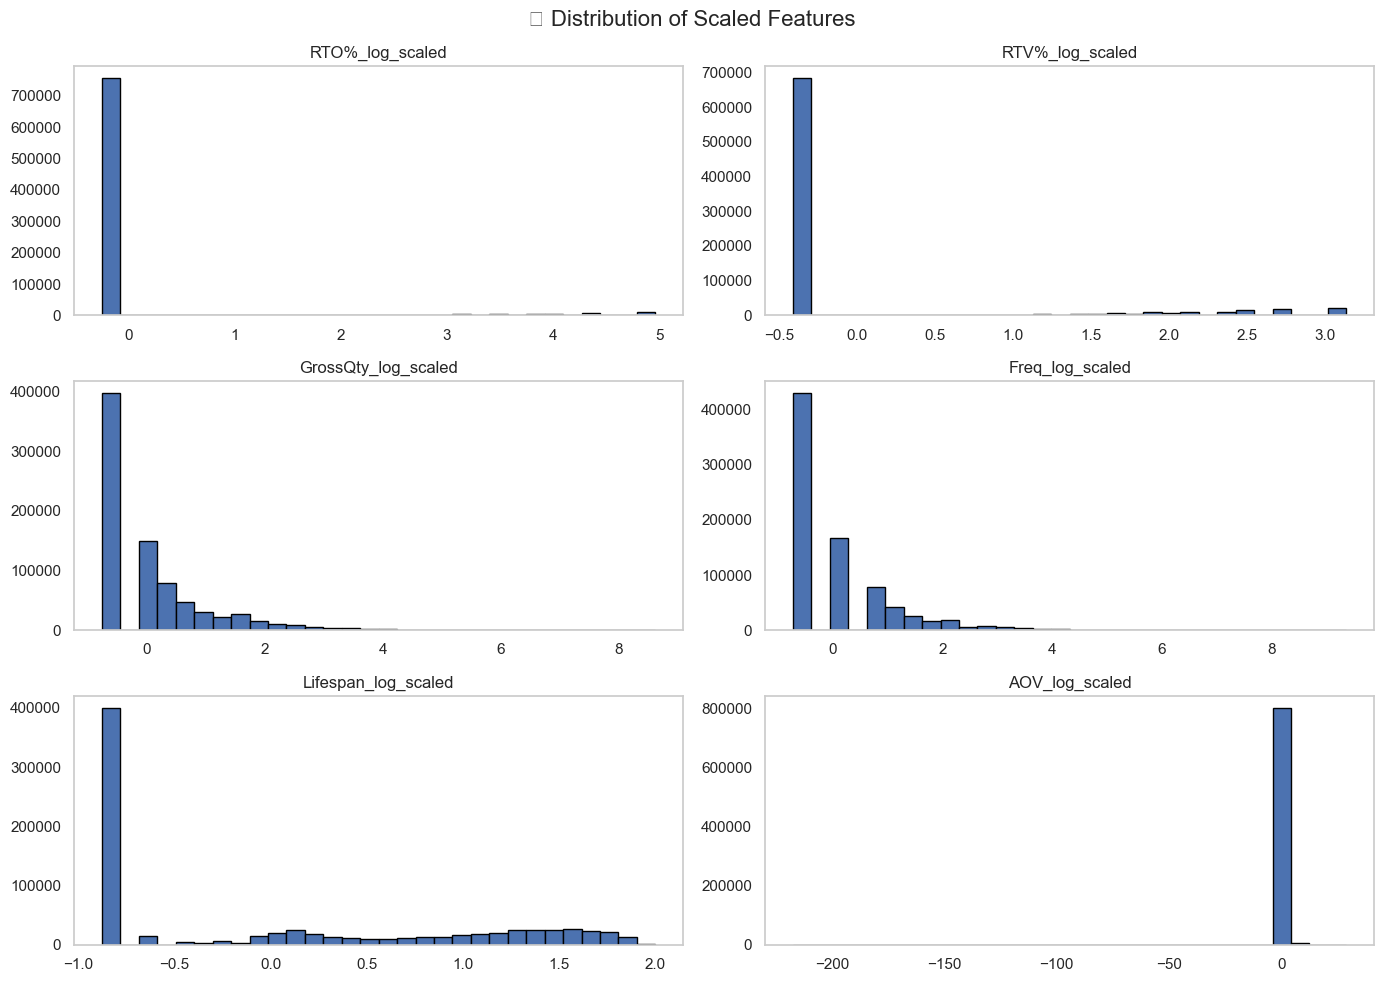

In [70]:
df_scaled.hist(bins=30, figsize=(14, 10), layout=(3, 2), edgecolor='black', grid=False)
plt.suptitle("Distribution of Scaled Features", fontsize=16)
plt.tight_layout()
plt.show()


In [75]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


df_log = df1[['RTO%_log', 'RTV%_log', 'GrossQty_log', 'Freq_log', 'Lifespan_log', 'AOV_log']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_log)


df_log_scaled = pd.DataFrame(scaled_data, columns=[
    'RTO%_log_scaled', 'RTV%_log_scaled', 'GrossQty_log_scaled',
    'Freq_log_scaled', 'Lifespan_log_scaled', 'AOV_log_scaled'
])


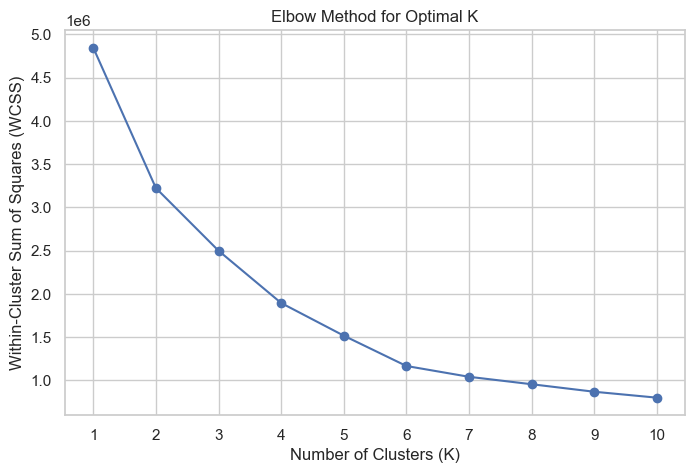

Elbow plot saved to: /Users/rarerabbit/Documents/Data Analysis/elbow_curve.jpg


In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_log_scaled.copy()

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(K_range)
plt.grid(True)

# Save the plot
elbow_plot_path = "/Users/rarerabbit/Documents/Data Analysis/elbow_curve.jpg"
plt.savefig(elbow_plot_path)
plt.show()

print(f"Elbow plot saved to: {elbow_plot_path}")


In [84]:
from sklearn.cluster import KMeans

k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_log_scaled['Cluster'] = kmeans.fit_predict(df_log_scaled)


df1['Customer_Cluster'] = df_log_scaled['Cluster']


In [85]:
print(df1['Customer_Cluster'].value_counts())


Customer_Cluster
0    473535
1    200698
3     86684
2     46585
Name: count, dtype: int64


In [80]:
cluster_summary = df1.groupby('Customer_Cluster').agg({
    'RTO%': ['mean', 'median'],
    'RTV%': ['mean', 'median'],
    'Gross Sold Qty': ['mean', 'median'],
    'Order Frequency': ['mean', 'median'],
    'Lifespan': ['mean', 'median'],
    'AOV': ['mean', 'median']
}).round(2)

print(cluster_summary)


                   RTO%          RTV%        Gross Sold Qty         \
                   mean median   mean median           mean median   
Customer_Cluster                                                     
0                  0.09    0.0   0.82    0.0           7.41    5.0   
1                  0.00    0.0   0.00    0.0           1.45    1.0   
2                  0.00    0.0  29.83   25.0           2.46    2.0   
3                 26.40   25.0   3.90    0.0           3.03    2.0   

                 Order Frequency        Lifespan             AOV           
                            mean median     mean median     mean   median  
Customer_Cluster                                                           
0                           4.87    3.0   501.70  372.0  3097.41  2346.18  
1                           1.12    1.0     3.92    0.0  2544.75  1949.35  
2                           2.84    2.0   210.38   31.0  1697.51  1395.65  
3                           4.36    3.0   386.87  238

/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/214849470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Customer_Cluster', palette='Set2')


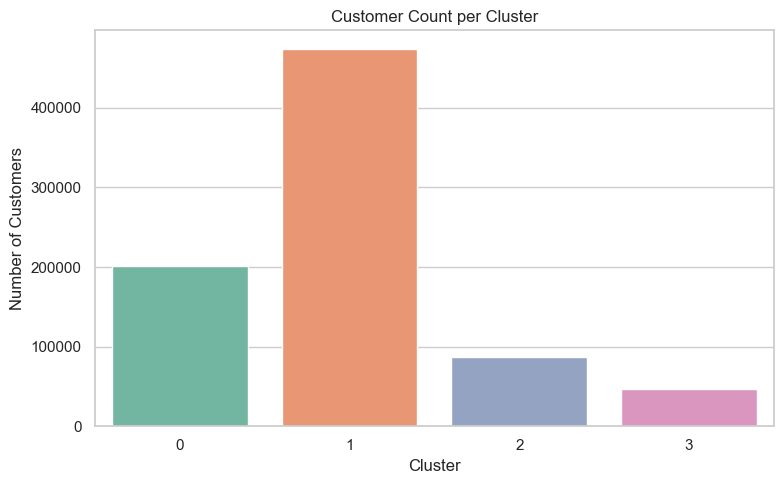

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='Customer_Cluster', palette='Set2')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [86]:

df1['Customer_Score'] = (
    0.4 * df1['Order Frequency'] +
    0.3 * df1['AOV'] +
    0.3 * df1['Lifespan']
)


df1['Customer_Tier_Label'] = pd.qcut(
    df1['Customer_Score'],
    q=[0, 0.7, 0.85, 0.95, 1.0],  
    labels=['Bronze', 'Silver', 'Gold', 'Platinum']
)


In [88]:
tier_counts = df1['Customer_Tier_Label'].value_counts().reindex(['Bronze', 'Silver', 'Gold', 'Platinum'])
print(tier_counts)


Customer_Tier_Label
Bronze      565251
Silver      121126
Gold         80749
Platinum     40376
Name: count, dtype: int64


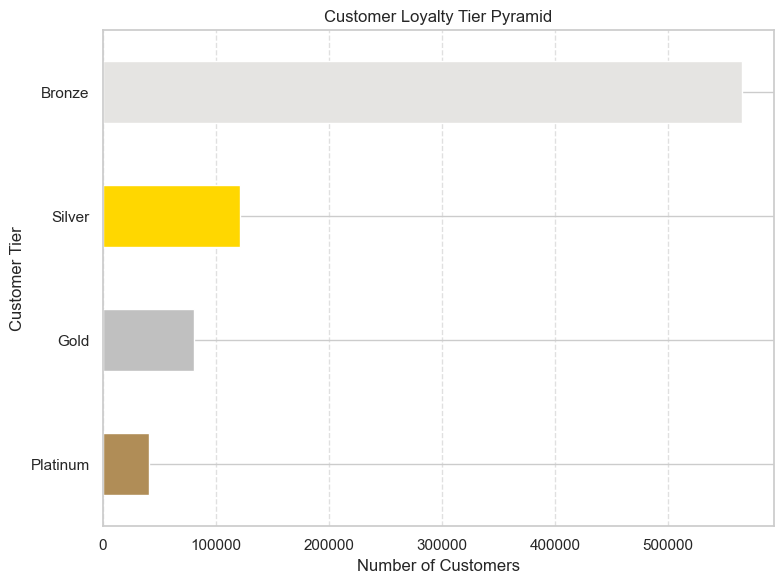

📊 Pyramid plot saved to: /Users/rarerabbit/Documents/Data Analysis/customer_tier_pyramid.jpg


In [89]:
import matplotlib.pyplot as plt

# Plotting pyramid
plt.figure(figsize=(8, 6))
tier_counts[::-1].plot(kind='barh', color=['#b08d57', '#c0c0c0', '#ffd700', '#e5e4e2'])

plt.title("Customer Loyalty Tier Pyramid")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Tier")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the pyramid diagram
plot_path = "/Users/rarerabbit/Documents/Data Analysis/customer_tier_pyramid.jpg"
plt.savefig(plot_path)
plt.show()

print(f"📊 Pyramid plot saved to: {plot_path}")


In [90]:
# Get the score boundaries for each tier
score_thresholds = df1.groupby('Customer_Tier_Label')['Customer_Score'].agg(['min', 'max']).reindex(['Bronze', 'Silver', 'Gold', 'Platinum'])
print("📊 Score Thresholds:\n", score_thresholds)


📊 Score Thresholds:
                            min        max
Customer_Tier_Label                      
Bronze              -12051.080    882.284
Silver                 882.300   1207.912
Gold                  1207.916   1837.630
Platinum              1837.648  36409.582


/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/4109361687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_thresholds = df1.groupby('Customer_Tier_Label')['Customer_Score'].agg(['min', 'max']).reindex(['Bronze', 'Silver', 'Gold', 'Platinum'])


In [91]:
# Get average feature values per tier
feature_benchmarks = df1.groupby('Customer_Tier_Label')[['Order Frequency', 'AOV', 'Lifespan']].mean().round(2)
print("📌 Feature Benchmarks:\n", feature_benchmarks)


📌 Feature Benchmarks:
                      Order Frequency      AOV  Lifespan
Customer_Tier_Label                                    
Bronze                          2.20  1650.41    125.69
Silver                          3.14  3089.41    303.32
Gold                            2.99  4578.07    283.95
Platinum                        2.34  8992.91    200.43


/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/792284572.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_benchmarks = df1.groupby('Customer_Tier_Label')[['Order Frequency', 'AOV', 'Lifespan']].mean().round(2)


In [95]:
df1['Customer_Score'] = (
    0.4 * df1['Order Frequency'] +
    0.3 * df1['AOV'] +
    0.3 * df1['Lifespan'] -
    25 * df1['RTO%'] -      
    10 * df1['RTV%']
)


In [98]:
df1['Customer_Tier_Label'] = pd.qcut(
    df1['Customer_Score'],
    q=[0, 0.7, 0.85, 0.95, 1.0],  # 70% Bronze, 15% Silver, 10% Gold, 5% Platinum
    labels=['Bronze', 'Silver', 'Gold', 'Platinum']
)


In [99]:
print(df1['Customer_Tier_Label'].value_counts().sort_index())



Customer_Tier_Label
Bronze      565405
Silver      120971
Gold         80750
Platinum     40376
Name: count, dtype: int64


In [100]:
tier_benchmarks = df1.groupby('Customer_Tier_Label')[
    ['Order Frequency', 'AOV', 'Lifespan', 'RTO%', 'RTV%']
].mean().round(2)

print("📊 Updated Feature Benchmarks:\n", tier_benchmarks)


📊 Updated Feature Benchmarks:
                      Order Frequency      AOV  Lifespan  RTO%  RTV%
Customer_Tier_Label                                                
Bronze                          2.24  1652.27    131.06  2.15  4.79
Silver                          3.03  3083.72    287.43  0.15  1.05
Gold                            2.89  4578.04    271.46  0.11  0.88
Platinum                        2.33  8989.50    198.39  0.10  0.66


/var/folders/__/g2t3zgbj1w77pvkncf1djzsh0000gn/T/ipykernel_67438/2783990756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_benchmarks = df1.groupby('Customer_Tier_Label')[


In [102]:
# Select key columns to export
final_columns = [
    'CUSTOMER_MOBILE', 'Customer_Cluster', 'Customer_Tier_Label', 'Customer_Score',
    'Order Frequency', 'AOV', 'Lifespan', 'RTO%', 'RTV%'
]

df_export = df1[final_columns]

output_path = "/Users/rarerabbit/Documents/Data Analysis/final_customer_segmentation.csv"
df_export.to_csv(output_path, index=False)

print(f"Final segmentation file saved to: {output_path}")


Final segmentation file saved to: /Users/rarerabbit/Documents/Data Analysis/final_customer_segmentation.csv
